In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

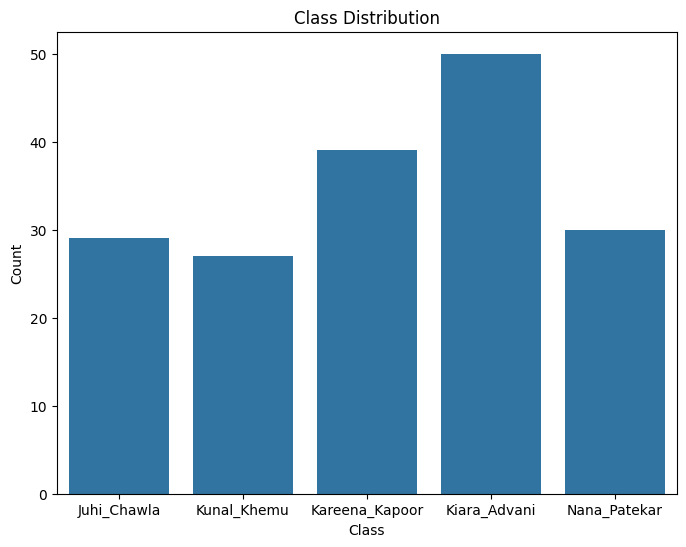

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img

# Define directories
train_dir = '/content/drive/MyDrive/bollywood/train'
test_dir = '/content/drive/MyDrive/bollywood/test'
val_dir = '/content/drive/MyDrive/bollywood/val'

# Function to plot class distribution
def plot_class_distribution(directory):
    class_counts = {}
    for subdir in os.listdir(directory):
        class_counts[subdir] = len(os.listdir(os.path.join(directory, subdir)))
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Plot class distribution for training data
plot_class_distribution(train_dir)



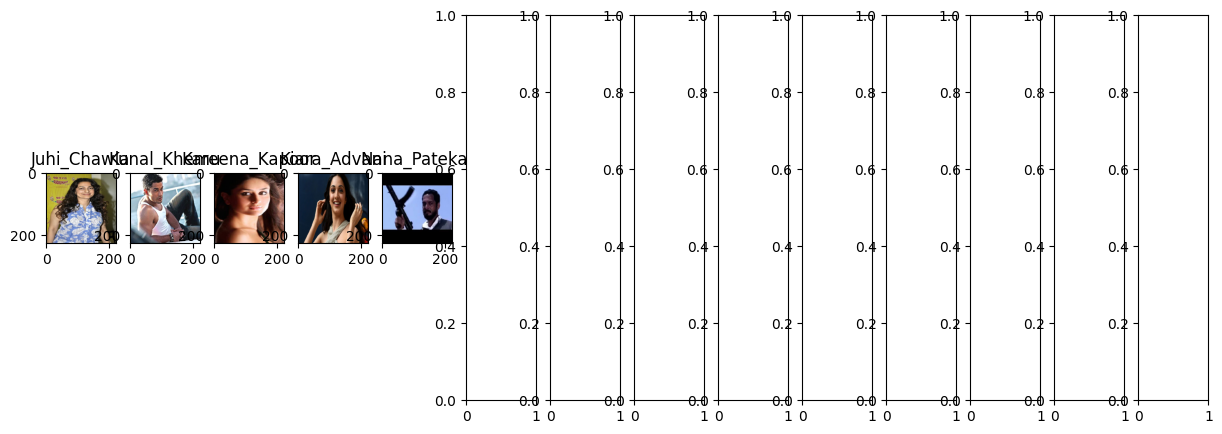

In [4]:
def display_sample_images(directory, num_images=14):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, subdir in enumerate(os.listdir(directory)[:num_images]):
        img_file = os.listdir(os.path.join(directory, subdir))[0]
        img_path = os.path.join(directory, subdir, img_file)
        img = load_img(img_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].set_title(subdir)
        # axes[i].axis('off')
    plt.show()

# Display sample images from training data
display_sample_images(train_dir)

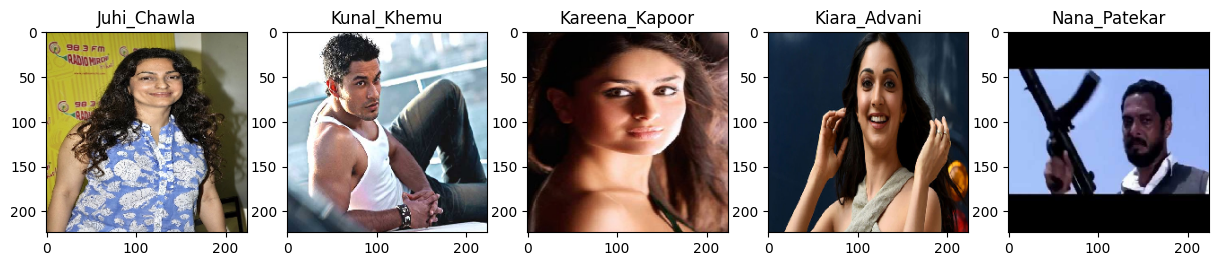

In [5]:
def display_sample_images(directory, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, subdir in enumerate(os.listdir(directory)[:num_images]):
        img_file = os.listdir(os.path.join(directory, subdir))[0]
        img_path = os.path.join(directory, subdir, img_file)
        img = load_img(img_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].set_title(subdir)
        # axes[i].axis('off')
    plt.show()

# Display sample images from training data
display_sample_images(train_dir)

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/drive/MyDrive/bollywood/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(

    directory = r'/content/drive/MyDrive/bollywood/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 175 files belonging to 5 classes.
Found 175 files belonging to 5 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


6/6 [==============================] - 120s 12s/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+00 - val_accuracy: 0.2229
Epoch 2/10
6/6 [==============================] - 3s 360ms/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+00 - val_accuracy: 0.2229
Epoch 3/10
6/6 [==============================] - 4s 573ms/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+00 - val_accuracy: 0.2229
Epoch 4/10
6/6 [==============================] - 3s 360ms/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+00 - val_accuracy: 0.2229
Epoch 5/10
6/6 [==============================] - 3s 356ms/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+00 - val_accuracy: 0.2229
Epoch 6/10
6/6 [==============================] - 4s 585ms/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+00 - val_accuracy: 0.2229
Epoch 7/10
6/6 [==============================] - 5s 579ms/step - loss: 0.0000e+00 - accuracy: 0.2229 - val_loss: 0.0000e+0

In [12]:
train_dir = '/content/drive/MyDrive/bollywood/train'
test_dir = '/content/drive/MyDrive/bollywood/test'
val_dir = '/content/drive/MyDrive/bollywood/val'
# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 174 images belonging to 5 classes.
Found 174 images belonging to 5 classes.
Found 174 images belonging to 5 classes.


###VGG MODEL

In [13]:
def create_vgg_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(5, activation='softmax')
    ])
    return model

In [14]:
# Compile and train the models
vgg_model = create_vgg_model()
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(train_generator, epochs=10, validation_data=validation_generator)

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
6/6 [==============================] - 127s 23s/step - loss: 3.8559 - accuracy: 0.2299 - val_loss: 2.6757 - val_accuracy: 0.4713
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 2.8918 - accuracy: 0.3391 - val_loss: 0.8340 - val_accuracy: 0.6322
Epoch 3/10
6/6 [==============================] - 9s 2s/step - loss: 1.5265 - accuracy: 0.4828 - val_loss: 0.6780 - val_accuracy: 0.7931
Epoch 4/10
6/6 [==============================] - 9s 2s/step - loss: 1.1751 - accuracy: 0.5287 - val_loss: 0.6360 - val_accuracy: 0.7989
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 0.9867 - accuracy: 0.6092 - val_loss: 0.5751 - val_accuracy: 0.8218
Epoch 6/10
6/6 [==============================] - 6s 1s/step - loss: 0.7611 - accuracy: 0.7299 - val_loss: 0.4836 - val_accuracy: 0.8506
Epoch 7/10
6/6 [==============================] - 6s 981ms/step - loss: 0.7109 - accuracy: 0.7299 - val_loss:

In [15]:
def create_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
       # tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(5, activation='softmax')
    ])
    return model


In [16]:
resnet_model = create_resnet_model()
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(train_generator, epochs=10, validation_data=validation_generator)

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/10
6/6 [==============================] - 13s 1s/step - loss: 23.5754 - accuracy: 0.2069 - val_loss: 18.2982 - val_accuracy: 0.2241
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 12.9179 - accuracy: 0.2586 - val_loss: 3.2340 - val_accuracy: 0.1724
Epoch 3/10
6/6 [==============================] - 6s 1s/step - loss: 4.8022 - accuracy: 0.2069 - val_loss: 4.6790 - val_accuracy: 0.2989
Epoch 4/10
6/6 [==============================] - 9s 2s/step - loss: 4.0797 - accuracy: 0.2989 - val_loss: 2.2709 - val_accuracy: 0.3563
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 2.0253 - accuracy: 0.3448 - val_loss: 2.5131 - val_accuracy: 0.3678
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 2.1799 - accuracy: 0.3851 - val_loss: 1.5386 - val_accuracy: 0.4023
Epoch 7/10
6/6 [==============================] - 6s 1s/step - loss: 1.7101 - accuracy: 0.3448 - val_loss: 1.

###MOBILNET MODEL

###Evaluating and Comparing the performance of the models

6/6 [==============================] - 2s 302ms/step - loss: 0.0403 - accuracy: 0.9770
VGG Model Test Accuracy: 0.977011501789093
ResNet Model Test Accuracy: 0.48275861144065857
MobileNet Model Test Accuracy: 0.977011501789093


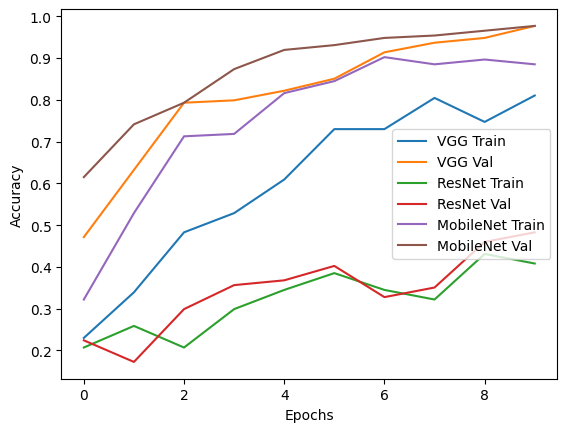

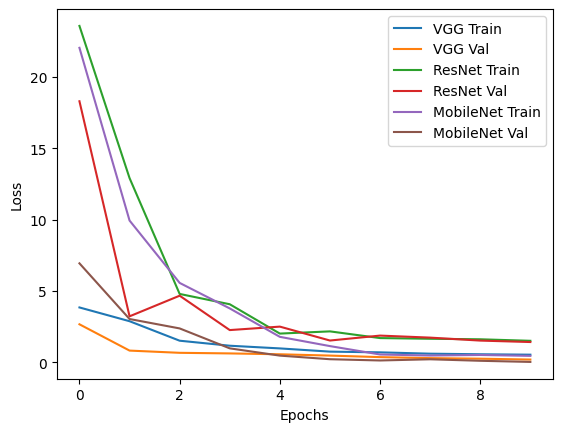

In [19]:
# Evaluate the models on the test set
vgg_scores = vgg_model.evaluate(test_generator)


print("VGG Model Test Accuracy:", vgg_scores[1])
print("ResNet Model Test Accuracy:", resnet_scores[1])


# Plot training and validation accuracy
plt.plot(vgg_history.history['accuracy'], label='VGG Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Val')
plt.plot(resnet_history.history['accuracy'], label='ResNet Train')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet Val')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(vgg_history.history['loss'], label='VGG Train')
plt.plot(vgg_history.history['val_loss'], label='VGG Val')
plt.plot(resnet_history.history['loss'], label='ResNet Train')
plt.plot(resnet_history.history['val_loss'], label='ResNet Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Model Save

In [20]:
# model.save("/content/drive/MyDrive/dataset/BirdDroneDataset/birdvsdrone.h5")
vgg_model.save("/content/drive/MyDrive/bollywood/bollywood_vgg.h5")
resnet_model.save("/content/drive/MyDrive/bollywood/bollywood_resnet.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Model Testing


Predictions using VGG model:
Image: /content/drive/MyDrive/bollywood/test/Juhi_Chawla/4.jpg
1/1 [==============================] - 0s 28ms/step
Predicted class: Juhi_Chawla


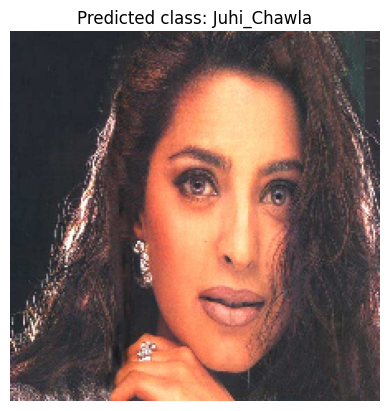


Image: /content/drive/MyDrive/bollywood/test/Nana_Patekar/45.jpg
1/1 [==============================] - 0s 30ms/step
Predicted class: Nana_Patekar


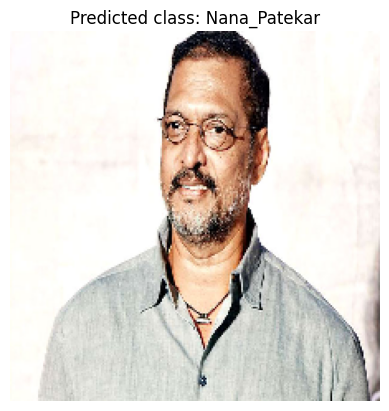

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_image(model, img_path, class_labels):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]

    print(f"Predicted class: {predicted_class_label}")

    # Display the image
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class_label}")
    plt.axis('off')
    plt.show()

# Test images paths
test_images = [
    '/content/drive/MyDrive/bollywood/test/Juhi_Chawla/4.jpg',
    '/content/drive/MyDrive/bollywood/test/Nana_Patekar/45.jpg'
]  # Replace with your test image paths

# Define your class labels
class_labels = ['Juhi_Chawla', 'Kareena_Kapoor', 'Kiara_Advani', 'Kunal_Khemu', 'Nana_Patekar']  # Replace with your actual class names

# Test the images with each model
for model, model_name in zip([vgg_model], ['VGG']):
    print(f"Predictions using {model_name} model:")
    for img_path in test_images:
        print(f"Image: {img_path}")
        predict_image(model, img_path, class_labels)
        print()
